In [13]:
import torch
from torchvision import models
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as T
import numpy as np

In [14]:
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

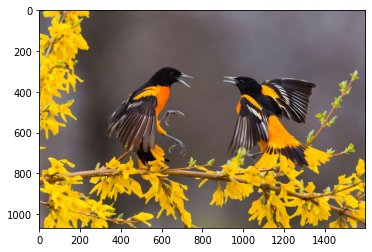

In [15]:
img = Image.open('Demo1.jpg')
plt.imshow(img)
plt.show()

In [16]:
transf = T.Compose([T.Resize(256),
                    #T.CenterCrop(224),
                    T.ToTensor(),
                    T.Normalize(mean = [0.485, 0.456, 0.406],
                                std= [0.229, 0.224, 0.225])])

input = transf(img).unsqueeze(0)

In [17]:
out = fcn(input)['out']
print(out.shape)

torch.Size([1, 21, 256, 383])


In [18]:
convert2D = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print(convert2D.shape)
print(np.unique(convert2D))

(256, 383)
[0 3]


In [19]:
def decode_segmap(image, nc=21):
    label_colors = np.array([(0, 0, 0),  # 0=background
                            (128, 0, 0), (0, 128, 0), (255, 255, 255), (0, 0, 128), (128, 0, 128), # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
                            (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0), # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
                            (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),# 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
                            (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)# 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
                           ])

    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]
    rgb = np.stack([r, g, b], axis=2)
    return rgb

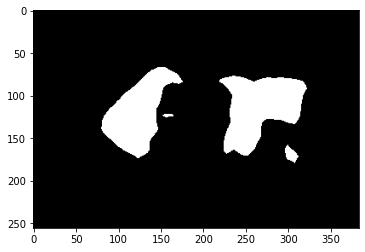

In [20]:
rgb = decode_segmap(convert2D)
plt.imshow(rgb)
plt.show()

In [21]:
def segment(net, path):
  img = Image.open(path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  trf = T.Compose([#T.Resize(256),
                   #T.CenterCrop(224),
                   T.ToTensor(),
                   T.Normalize(mean = [0.485, 0.456, 0.406],
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb)
  plt.axis('off')
  plt.show()

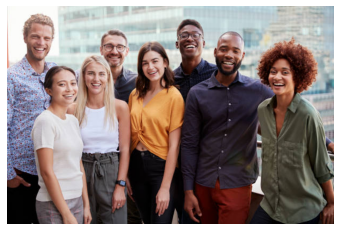

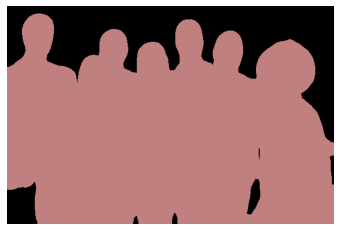

In [22]:
segment(fcn, 'people.jpg')

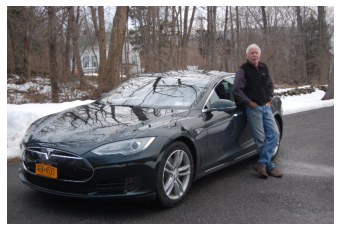

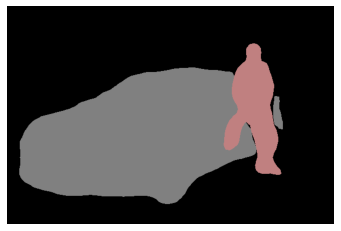

In [23]:
segment(fcn, 'car1.jpg')